# Implementing a Neural Network from Scratch in Python

### Data Generation

In [1]:
%matplotlib inline
import numpy as np
import sklearn
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

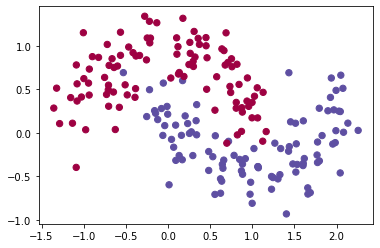

In [2]:
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral);

Our goal is to train a Machine Learning classifier that predicts the correct class, given the x- and y- coordinates. Note that the data is not linearly separable, we can’t draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won’t be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that’s one of the major advantages of Neural Networks. We don’t need to worry about feature engineering. The hidden layer of a neural network will learn features for us.

### Logistic Regression

In [3]:
# Train the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegressionCV
logreg = sklearn.linear_model.LogisticRegressionCV()
logreg.fit(X, y)

LogisticRegressionCV()

In [4]:
# Helper function to plot decision boundary
def plot_decision_boundary(pred_func):

    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    h = 0.01

    # Generate grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict function value for whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and Training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

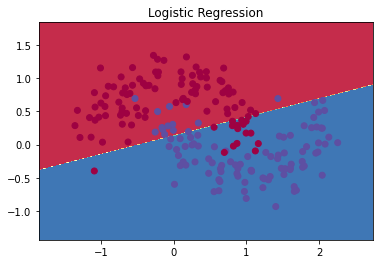

In [5]:
# Plot the decision boundary
plot_decision_boundary(lambda x: logreg.predict(x))
plt.title("Logistic Regression")

### Neural Network

In [6]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon=0.01
reg_lambda=0.01

In [7]:
# Evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    # Forward propagation to calculate our predictions
    z1 = np.dot(X, W1)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, W2)+b2
    a2 = np.tanh(z2)

    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)  # Softmax

    # Calculating Loss
    actual_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(actual_logprobs)

    # Adding Regularization to loss
    data_loss += (reg_lambda/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return (1/num_examples)*data_loss

In [8]:
# Predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]

    # Forward Propagation
    z1 = np.dot(x, W1)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, W2)+b2

    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [9]:
# Train model to learn parameters for the neural network and return the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations


def build_model(nn_input_dim, nn_output_dim, nn_hdim, num_passes=20000, print_loss=False):
    # Initialize parameters
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim)/np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)/np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}

    # Gradient Descent
    for i in range(0, num_passes):

        # Forawrd Propagation
        z1 = np.dot(X, W1)+b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, W2)+b2
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = np.dot(a1.T, delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = np.dot(delta3, W2.T)*(1-np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Adding Regularization
        dW2 += reg_lambda*W2
        dW1 += reg_lambda*W1

        # Gradient Descent parameter update
        W1 += -epsilon*dW1
        b1 += -epsilon*db1
        W2 += -epsilon*dW2
        b2 += -epsilon*db2

        # Assigning new parameters to model
        model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

        if (print_loss == True and i % 1000 == 0):
            print("Loss after iteration {0}: {1}".format(
                i, calculate_loss(model)))
    return model

In [10]:
# Building model with # Hidden layers
model = build_model(2, 2, 3, print_loss=True)

Loss after iteration 0: 0.43238663152549245
Loss after iteration 1000: 0.06894653811984068
Loss after iteration 2000: 0.06889681775312731
Loss after iteration 3000: 0.07075200452953827
Loss after iteration 4000: 0.07074835668127517
Loss after iteration 5000: 0.07075121204445052
Loss after iteration 6000: 0.0707540746918709
Loss after iteration 7000: 0.0707560589849843
Loss after iteration 8000: 0.07075727483920381
Loss after iteration 9000: 0.07075795746299769
Loss after iteration 10000: 0.07075830081337536
Loss after iteration 11000: 0.07075843977106865
Loss after iteration 12000: 0.07075846190899818
Loss after iteration 13000: 0.0707584217917754
Loss after iteration 14000: 0.07075835227321785
Loss after iteration 15000: 0.07075827241664394
Loss after iteration 16000: 0.07075819275508613
Loss after iteration 17000: 0.07075811867461322
Loss after iteration 18000: 0.07075805254075135
Loss after iteration 19000: 0.07075799500908352


Text(0.5, 1.0, 'Decision Boundary for 3 Hidden Layers.')

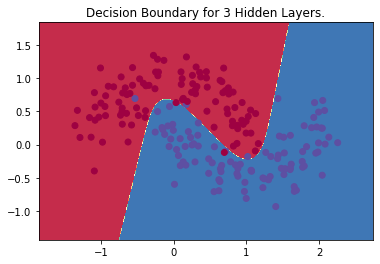

In [11]:
# Plot decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for 3 Hidden Layers.")

### Varying the Hidden Layer size

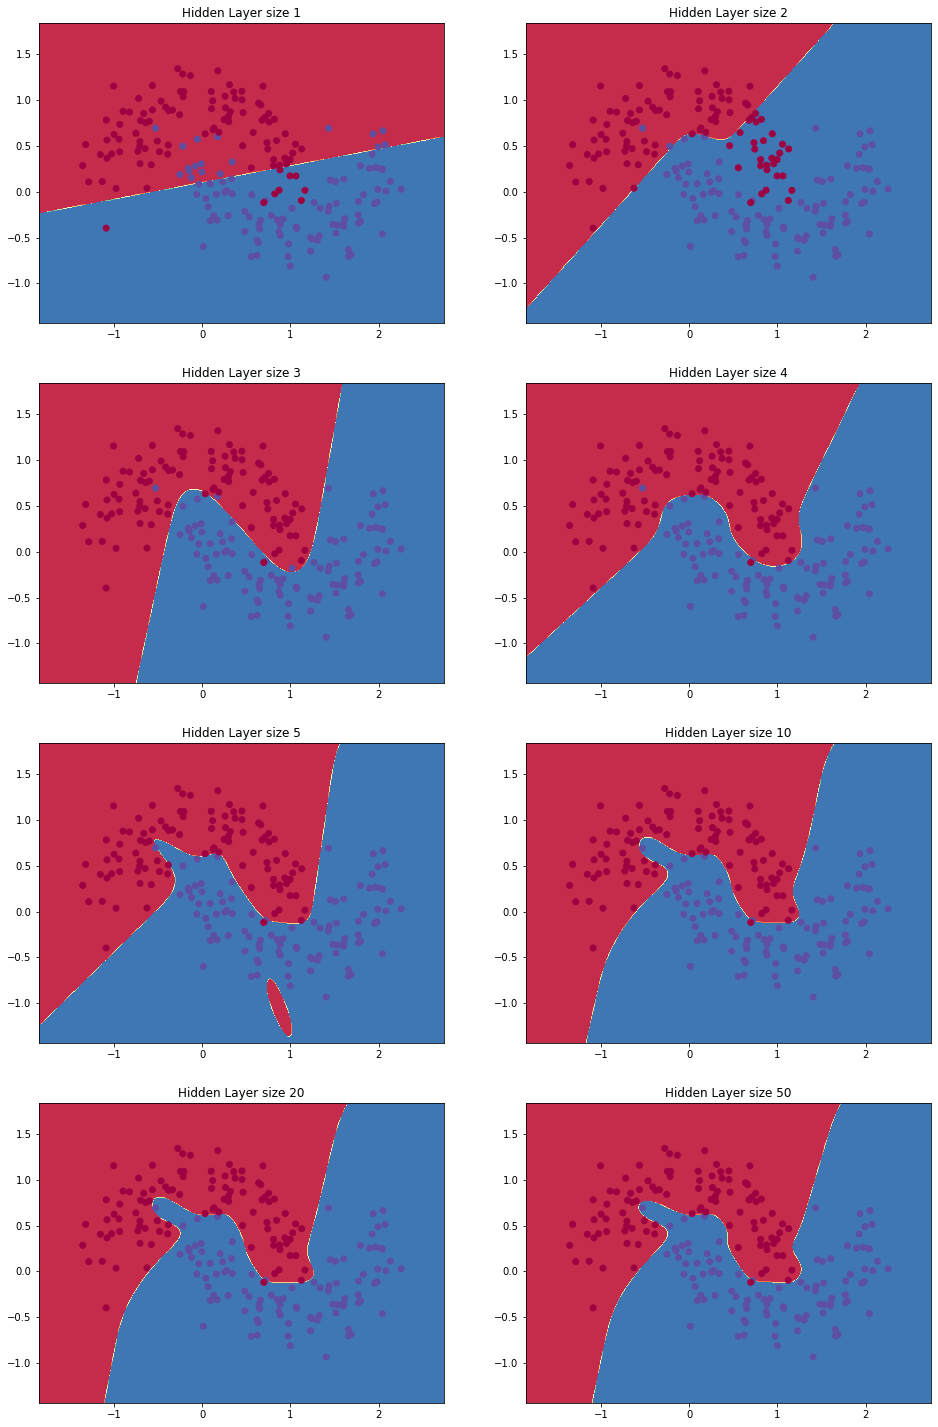

In [12]:
plt.figure(figsize=(16,32))
hidden_layer_dimensions=[1,2,3,4,5,10,20,50]

for i,nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5,2,i+1)
    plt.title("Hidden Layer size {0}".format(nn_hdim))
    model=build_model(2,2,nn_hdim)
    plot_decision_boundary(lambda x:predict(model,x))
plt.show()

hidden layer of low dimensionality nicely captures the general trend of data. Higher dimensionalities are prone to overfitting. 